## Machine Learning system for Credit Risk
- This is a fourth part of the bachelor thesis where I will build a complete **Machine Learning system for Credit Risk**, including models to predict the three components of expected loss in the context of **credit risk modeling** at the **Lending Club** (a peer-to-peer lending company): **Probability of Default (PD), Exposure at Default (EAD) and Loss Given Default (LGD)**. 
- The expected loss will be the product of these elements: **Expected Loss (EL) = PD * EAD * LGD**. These models will be used to stablish a credit policy, deciding wheter to grant a loan or not for new applicants (application model) based on their credit scores and expected losses on loans. By estimating the Expected Loss (EL) from each loan, the Lending Club can also assess the required capital to hold to protect itself against defaults.
- The PD modelling encompasses an imbalanced binary classification problem with target being 1 in case of non-default and 0 in case of default (minority class). A Logistic Regression model will be built. 
- The LGD and EAD modelling encompasses a beta regression problem, that is, a regression task in which the dependent variables are beta distributed, the recovery rate and credit conversion factor, respectively.
- The **methodologies** is intergreated with the **crisp-dm** framework:
    1. Business understanding.
    2. Data understanding.
    3. Data preparation.
    4. Modelling.
    5. Validation.
    6. Deployment.
- Below, I will introduce **information** about the **company**, the **business problem**, the **project objectives and benefits**, and some important **concepts** to have in mind, given that I am dealing with a credit risk problem.

## Lending Club
- **What is the Lending Club?:**
    - LendingClub is a **peer-to-peer lending platform** that facilitates the borrowing and lending of money directly between individuals, without the need for traditional financial institutions such as banks. The platform operates as an online marketplace, connecting borrowers seeking personal loans with investors willing to fund those loans.

## Business Problem: Managing Default Risks and Optimizing Returns
- **What is the business problem?**
    - LendingClub faces a significant business challenge related to **managing default risks effectively** while **optimizing returns** for its investors. The platform facilitates peer-to-peer lending, connecting borrowers with investors, and relies on **accurate risk assessments to maintain a sustainable and profitable lending ecosystem.** Thus, the CEO wants us to provide insights about which factors are associated with credit risk in Lending Club's operations, and to construct models capable of predicting the probability of default for new applicants and possible losses on its loans in order to establish a credit policy, deciding when to grant a loan or not for an applicant. An important observation is that the CEO wants these models to be easy to understand. Since our company works on the internet, making customers happy and being clear is really important. So, we need to be able to explain why we decide to approve or deny a loan.
- **Which are the project objectives and benefits?**
    1. Identify the factors associated with **credit risk** in the form of business **insights.**
    2. Develop an accurate **Probability of Default (PD) Model**, constructing a scorecard. This will allow Lending Club to decide wheter to grant a loan or not to a new applicant (**application model**), based on **credit scores.**
    3. Develop **Exposure at Default (EAD) and Loss Given Default (LGD) Models**, to estimate the **Expected Loss** in loans. This will allow Lending Club to **hold** sufficient **capital** to protect itself against default in each loan.
    4. Improve **risk management** and optimize **returns** by establishing a **credit policy**, trying to balance risk and **ROI** of Lending Club's assets.
    5. Apply **model monitoring** and maintenance techniques to safeguard our results from population instability, characterized by significant changes in loan applicants' characteristics. This will allow us to understand whether the built model is still useful in the future or whether the loan applicants characteristics changed significantly, such that we will need to redevelop it.

## Credit Risk Modeling Concepts: The Context of the Problem
- **Financial institutions**, like LendingClub and online lending platforms, **make money by lending to people and businesses.** When they lend money, they **charge interest**, which is a significant source of their **profits**. **Managing credit risk well is crucial** for these institutions. This means ensuring that borrowers pay back their loans on time to avoid losses.
- **Credit risk** is the possibility that a borrower might not fulfill their financial obligations, leading to a loss for the lender. If a borrower fails to meet the agreed-upon terms, it's called a "default," and it can result in financial losses for the lender. The **default** definition is associated with a time horizon. For example, if a borrower hasn't paid their debt within 90 days of the due date, they are considered in default.
- In the credit market, important **rules** help keep things honest and clear. **Basel III** is one such set of rules, making sure banks have **enough money (capital requirements)** and follow **guidelines for assessing loan risks**. The **Internal Rating-Based Approach (IRB-A)** lets banks figure out credit risks using concepts like Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD). Another rule, **International Financial Reporting Standard 9 (IFRS 9)**, gives standards for measuring financial assets. It's special because it looks at the chance of a loan not being paid back over its entire life, unlike Basel, which checks it for one year. These rules help banks have enough money, handle risks well, and keep the credit market steady and trustworthy.
- The **"expected loss (EL)"** is the average estimated loss that a lender can expect from loans that default. It involves three factors: the **probability of default (likelihood of a borrower defaulting)**, **loss given default (portion of the amount the bank is exposed to that can't be recovered in case of default)**, and **exposure at default (potential loss at the time of default, considering the outstanding loan amount and other factors)**.
- **LendingClub**, operating as a peer-to-peer lending platform, uses a **"PD Model/Credit Scoring Model" to assess borrowers' creditworthiness using credit scores**. This helps determine the **likelihood of loan repayment**, guiding the decision to **approve or deny the loan.** The **required capital to guard against default** for each loan is calculated using **EAD and LGD Models** to estimate the **Expected Loss (EL)**, contributing to minimizing risk in credit operations.
- When creating a Credit Scoring Model, which assesses creditworthiness for loan approval, using data available at the time of the application is considered an **"application model."** It is distinct from a "behavior model." This is the model I will build here.
- A **"credit policy"** is a set of guidelines that financial institutions follow to evaluate and manage lending risk. Factors such as the expected ROI for each loan application, credit scores, risk classes, expected losses, and so on, are included.
- **"Return on Investment (ROI)"** is a key measure of loan profitability. Balancing ROI with risk is vital for effective credit policy management. While higher-risk loans may offer more significant potential returns, they also come with a higher chance of default.

In **this notebook**, my goal is to **construct the Exposure at Default (EAD) and Loss Given Default (LGD) models**, estimating the **Expected Loss (EL = PD * EAD * LGD)** for each loan, in addition to the PD Model. Once these three components are estimated, I will formulate a **credit policy**, determining loan approval or denial based on these results. These tasks correspond to steps 3, 4, and 5 of the CRISP-DM framework. The rationale behind each decision is detailed below.

#### 4.0 Import the Libraries

In [3]:
import sys
sys.path.append('E:\lending_club_rep\Lending-Club-Credit-Scoring')

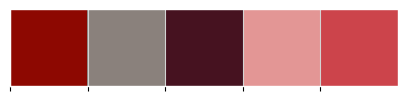

In [4]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Modeling.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel

# Utils.
from src.eda_utils import *
from src.modelling_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
#mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 4.1 Collect the Data
- The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. 
- Considering that **LGD** is the proportion of the total exposure that cannot be recovered by the lender when the borrower defaults, and **EAD** is the amount a lender is exposed to when the borrower defaults, to construct these models, I will obtain **data only from defaulted borrowers.**
- Moreover, a good practice is to separate data only from **borrowers who have had enough time to repay part of the remaining debt**, allowing the Lending Club to make some **recoveries**. Thus, I will obtain data from **defaulters** with a **loan status of "charged off."**
- **Charged off status of a loan**: Indicates that the lender or financial institution has declared the outstanding balance of the loan as unlikely to be collected. The lender considers the **debt** as **uncollectible**, a **loss**.

In [5]:
parquet_file_path = 'E:\lending_club_rep\Lending-Club-Credit-Scoring\data\clean_loan_data.parquet'
df = pd.read_parquet(parquet_file_path)

In [6]:
# Select data only from defaulters with a loan status charged off.
ead_lgd_df = df.loc[(df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off') |
                    (df['loan_status'] == 'Charged Off')]

In [7]:
# General information.
ead_lgd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43233 entries, 3 to 466242
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  loan_status                  category      
 13  purpose                      category      
 14  addr_state                   category      
 15  dti                          float32       
 16  delinq_2

- It is possible to see that the variables are in the correct data types, with optimized memory usage.
- We have 43,233 observations and 42 variables.

In [8]:
# Inspect duplicates.
ead_lgd_df.duplicated().sum()

0

In [9]:
# Inspect missing values.
missing_df = ead_lgd_df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / ead_lgd_df.shape[0] * 100, 3)
missing_df.head(10)

,count,pct
mths_since_last_delinq,23947,55.391
total_rev_hi_lim,10777,24.928
tot_cur_bal,10777,24.928
tot_coll_amt,10777,24.928
revol_util,50,0.116
collections_12_mths_ex_med,25,0.058
loan_amnt,0,0.000
total_rec_late_fee,0,0.000
initial_list_status,0,0.000
out_prncp,0,0.000


- There is still some missing values. Variables like 'collections_12_mths_ex_med', 'revol_util', 'tot_coll_amt' and others will be further removed from the data to prevent data leakage, once they will not be available at the moment of the application. 
- Moreover, we saw on EDA that total_rev_hi_lim is highly correlated with revol_bal. This can lead to multicolinearity issues in our model, thus, as in the PD Model, I will keep only revol_bal because it does not have null records, removing total_rev_hi_lim. 
- Thus, we just need to impute missings in 'mths_since_last_delinq' and 'tot_cur_bal'. I will decide how to impute them in the preprocessing step.

#### 4.2 Dependent variables
- I will visualize the LGD and EAD models dependent variables, the recovery rate and the credit conversion factor, to decide about how I will procceed with the modeling step.
- **recovery_rate:** This is our **target** variable for the **LGD Model**. Although LGD is defined as the proportion of the total exposure that cannot be recovered by the lender when the borrower defaults, a common and stablished approach when modeling it is to estimate the proportion of the total exposure that CAN be recovered by the lender, once the default has occurred, the Recovery Rate. Thus, **LGD = 1 - Recovery Rate.**
- **credit_conversion_factor:** This is our **target** variable for the **EAD Model.** Although EAD is defined as the total value that a lender is exposed to when the borrower defaults, a common and stablised approach when modeling it is to estimate the outstanding proportion of the funded amount when default event occurs, the Credit Conversion Factor. Thus, **EAD = Total Funded Amount * Credit Conversion Factor.**

In [10]:
# Descriptive statistics.
ead_lgd_df[['recovery_rate', 'credit_conversion_factor']].describe().T

,count,mean,std,min,25%,50%,75%,max
recovery_rate,43233.0,0.060740,0.089092,0.000000,0.000000,0.029453,0.114043,1.0
credit_conversion_factor,43233.0,0.735964,0.200735,0.000438,0.632088,0.789943,0.888544,1.0


Insights:
- The average recovery rate is 6%; however, almost 50% of the recoveries are 0.
- The average credit conversion factor is 73.6%. Half of the conversion factors are between 63.2% and 88.8%.

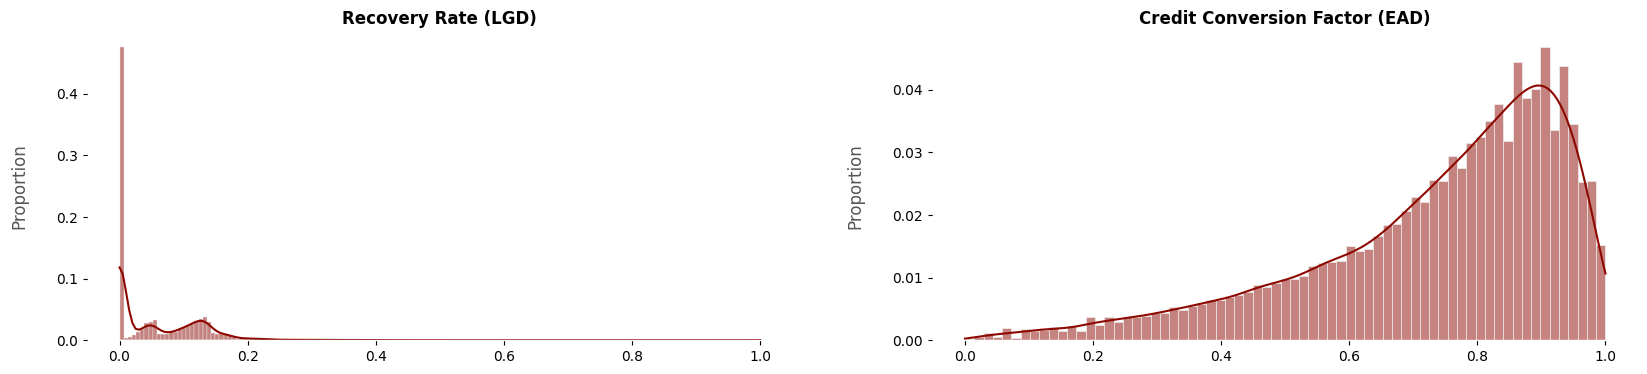

In [11]:
# Plot LGD and EAD dependent variables.
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

sns.histplot(data=ead_lgd_df, x='recovery_rate', kde=True, ax=ax[0], stat='proportion')
ax[0].set_title('Recovery Rate (LGD)', fontweight='bold', fontsize=12)
ax[0].set_xlabel('')
ax[0].set_ylabel('Proportion', labelpad=20)
ax[0].grid(False)

sns.histplot(data=ead_lgd_df, x='credit_conversion_factor', kde=True, ax=ax[1], stat='proportion')
ax[1].set_title('Credit Conversion Factor (EAD)', fontweight='bold', fontsize=12)
ax[1].set_xlabel('')
ax[1].set_ylabel('Proportion', labelpad=20)
ax[1].grid(False)

Insights:
- It is noticeable that **more than 40% of the recovery rates are 0.** When building a regression model, such a bias could significantly impact performance. Thus, to **model recovery rate and LGD**, I will adopt a **two-stage approach:**
    - In the **first stage**, I will build a **Logistic Regression model** to **classify** whether the **recovery rate is 0 or greater than 0.** For the recoveries classified as zero, the process will conclude. For the **recoveries classified as greater than 0**, I will build a **regression model to predict their values**, constituting the **second stage** of LGD modeling.
- For the credit conversion factor, we have a more balanced distribution. Thus, a regression model is sufficient.
- I will create the **target for the first stage approach of the LGD Model**. It will be a binary variable indicating 0 if the recovery rate is 0 and 1 if the recovery rate is greater than zero.

In [12]:
# Create the target for the two-stage approach LGD modeling.
ead_lgd_df['recovery_rate_>0'] = np.where(ead_lgd_df['recovery_rate'] == 0, 0, 1)
ead_lgd_df['recovery_rate_>0'].value_counts(normalize=True)

recovery_rate_>0
1    0.563644
0    0.436356
Name: proportion, dtype: float64

- Lending Club was able to recover part of the lossess from about 56.3% of the defaulted loans.

#### 4.3 Split the data
- In the context of credit it's important to use an **out-of-time split** instead of an out-of-sample split because we want to understand how well the model, trained with past data, can predict the behavior of credit applicants in a future time. 
- The data was already sorted in data cleaning task, providing a chronological order for the loans. Thus, we only need to separate the first **80%** of the data for **training** and the remaining **20%** of the data for **testing**.
- I'll split the data first because the **test set** should contain data that the model hasn't encountered before, mimicking a **real-world production scenario.** So, I'll **set it aside now** and only use it for the final evaluation of the model later on.
- Furthermore, it's crucial to fit and transform only the training data to prevent issues like data leakage and overfitting, ensuring a reliable final performance estimate. Test data must only be transformed. Thus, the preprocessing will follow this guideline.

In [13]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(ead_lgd_df, [int(.80 * len(ead_lgd_df))])
train['set'] = 'train'
test['set'] = 'test'

# Assessing train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 34586 rows and 44 columns.
Test set has 8647 rows and 44 columns.


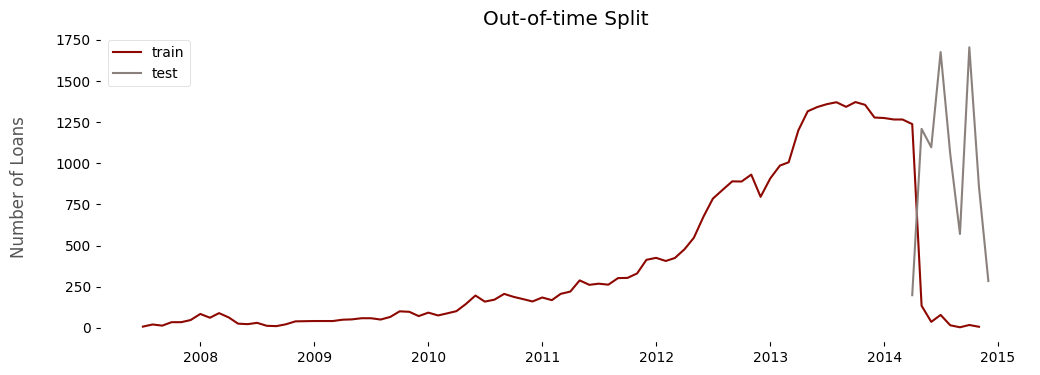

In [14]:
# Plot the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split')
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans', labelpad=20)
plt.grid(False)
plt.legend(loc='upper left')
plt.show()

# Drop columns used only for plotting.
to_drop = ['issue_d', 'set']
train = train.drop(columns=to_drop)
test = test.drop(columns=to_drop)

- The out-of-time split was successfully made.

#### 4.4 Data Preprocessing
- In order to **preprocess the data** for the **LGD** and **EAD models**, it is not necessary to extract only dummy variables. Since these models will be used by users familiar with statistics, we will follow these steps:
    - For the **categorical variables**, I will apply **one-hot encoding** to the **nominal** ones and **ordinal encoding** to the **ordinal ones**. I will remove arbitrary reference categories to avoid multicollinearity issues (dummy variable trap). This approach is chosen because we will use linear and logistic regressions, and these linear models benefit from one-hot encoding due to the linearity assumption. This technique is particularly helpful for treating non-ordinal features, where encoding with numbers could introduce a false hierarchy. Moreover, ordinal encoding will efficiently represent the ordinal variables, preserving their order property, and reducing dimensionality.
        - Since one-hot encoding already represents the variable with values of 0 or 1, there is no need to scale the data after this transformation.
        - I will apply standard scaling to the ordinal-encoded variables because they will not be at the same scale after this transformation.
        - I will combine categories for certain variables due to observations in the EDA revealing extremely low proportions in some categories. Creating dummies for these categories individually may result in overfitting. Additionally, combining categories allows me to reduce dimensionality.
    - For the **numerical variables**, we will apply **standard scaling**. Linear models use optimization algorithms such as gradient descent, and it is important for the convergence of these algorithms that the features are at the same scale. For example, in gradient descent using MSE, if the variables are not scaled, the MSE cost function resembles a large bowl, making convergence difficult.
    - For **handling missing values**, I will do the following:
        - **mths_since_last_delinq:** Since we interpret these missing values as instances where individuals were never delinquent, and considering the high proportion of records with nulls (more than 55%), I will impute them with -999. This will allow the model to capture the idea that these borrowers form a separate group, characterized by this value, indicating they were never delinquent. Moreover, this is a common practice seen in companies data bases.
        - **tot_cur_bal:** I will impute these values with the median, as the variable's distribution is right-skewed and contains many outliers, affecting the mean. This approach is expected to not introduce bias and work well, given the lower proportion of missing values.
- Moreover, the **same preprocessing steps** will be applied to the data to construct both **LGD and EAD models, except** that we will retain the corresponding **target** variable for each model. LGD 1st stage and EAD models will use the same input data, while LGD 2nd stage model will use input data with only greater than zero recovery rates, once these are those which we want to predict the corresponding value.
- Finally, **irrelevant variables** (identified in EDA) and variables that will not be available at the moment of prediction will be **removed**, preventing **data leakage** and maintaining the integrity of our models.

In [15]:
# Combine categories to avoid overfitting.
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South', 'KY': 'South', 'NC': 'South', 'SC': 'South', 'TN': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South', 'TX': 'South', 'OK': 'South',
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West', 'DC': 'Northeast',
}

# Create a new 'Region' column by mapping the state abbreviations to regions
train['region'] = train['addr_state'].replace(state_to_region)
test['region'] = test['addr_state'].replace(state_to_region)

train['home_ownership'] = train['home_ownership'].replace(['RENT', 'NONE', 'OTHER'], 'RENT_NONE_OTHER')
test['home_ownership'] = test['home_ownership'].replace(['RENT', 'NONE', 'OTHER'], 'RENT_NONE_OTHER')
train['purpose'] = train['purpose'].replace(['educational', 'renewable_energy'], 'other')
test['purpose'] = test['purpose'].replace(['educational', 'renewable_energy'], 'other')
train['purpose'] = train['purpose'].replace(['vacation', 'moving', 'wedding'], 'vacation_moving_wedding')
test['purpose'] = test['purpose'].replace(['vacation', 'moving', 'wedding'], 'vacation_moving_wedding')
train['purpose'] = train['purpose'].replace(['house', 'car', 'medical'], 'house_car_medical')
test['purpose'] = test['purpose'].replace(['house', 'car', 'medical'], 'house_car_medical')

# Impute mths_since_last_delinq missing values with -999, indicating never deliquent borrowers.
train['mths_since_last_delinq'] = train['mths_since_last_delinq'].fillna(-999)
test['mths_since_last_delinq'] = test['mths_since_last_delinq'].fillna(-999)

In [16]:
# Obtain predictor and target train and test sets for LGD and EAD models, removing irrelevant variables.
data_leakage_variables = ['funded_amnt', 'installment', 'revol_util', 
                         'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                         'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                         'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt']
irrelevant_variables = ['delinq_2yrs', 'acc_now_delinq', 'pub_rec', 
                        'total_rev_hi_lim', 'loan_status', 'default', 'addr_state']
to_drop = data_leakage_variables + irrelevant_variables

target_lgd_logistic = 'recovery_rate_>0'
target_lgd_linear = 'recovery_rate'
target_ead = 'credit_conversion_factor'
targets = [target_lgd_logistic, target_lgd_linear, target_ead]

# Same train and test sets will be applied to 1st stage of LGD and EAD.
X_train = train.drop(columns=to_drop + targets)
X_test = test.drop(columns=to_drop + targets)
y_train_lgd_logistic = train[target_lgd_logistic].copy()
y_test_lgd_logistic = test[target_lgd_logistic].copy()
y_train_ead = train[target_ead].copy()
y_test_ead = test[target_ead].copy()

# 2nd stage of LGD will be trained only in recovery rates greater than zero.
X_train_lgd_linear = train.loc[train['recovery_rate_>0'] == 1].drop(columns=to_drop + targets)
X_test_lgd_linear = test.loc[test['recovery_rate_>0'] == 1].drop(columns=to_drop + targets)
y_train_lgd_linear = train.loc[train['recovery_rate_>0'] == 1, target_lgd_linear].copy()
y_test_lgd_linear = test.loc[test['recovery_rate_>0'] == 1, target_lgd_linear].copy()

In [17]:
# Obtain the categorical and numerical variables.
categorical_variables = X_train.select_dtypes('category').columns.tolist()
numerical_variables = X_train.select_dtypes('number').columns.tolist()

# Treat 'term' as a categorical variable because it presents just 2 unique values, 36 and 60.
categorical_variables.append('term')
numerical_variables.remove('term')

print(f'There are {len(categorical_variables)} categorical variables. They are: {categorical_variables}.')
print(f'There are {len(numerical_variables)} categorical variables. They are: {numerical_variables}.')


There are 8 categorical variables. They are: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'region', 'term'].
There are 12 categorical variables. They are: ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_acc', 'tot_cur_bal', 'mths_since_earliest_cr_line'].


In [18]:
# Quickly visualize cardinality.
for variable in categorical_variables:
    print(f'{variable} | cardinality = {X_train[variable].nunique()}.')
    print(X_train[variable].unique().tolist())
    print()

grade | cardinality = 7.
['F', 'D', 'E', 'B', 'C', 'G', 'A']

sub_grade | cardinality = 35.
['F2', 'D3', 'D2', 'F3', 'E3', 'B1', 'C5', 'D5', 'F1', 'E4', 'D1', 'C4', 'E1', 'E2', 'C2', 'G2', 'G3', 'F5', 'C3', 'B5', 'B4', 'D4', 'F4', 'A2', 'G4', 'G5', 'C1', 'E5', 'B2', 'B3', 'G1', 'A3', 'A4', 'A5', 'A1']

home_ownership | cardinality = 3.
['MORTGAGE', 'RENT_NONE_OTHER', 'OWN']

verification_status | cardinality = 3.
['Verified', 'Not Verified', 'Source Verified']

purpose | cardinality = 8.
['debt_consolidation', 'other', 'house_car_medical', 'credit_card', 'vacation_moving_wedding', 'small_business', 'home_improvement', 'major_purchase']

initial_list_status | cardinality = 2.
['f', 'w']

region | cardinality = 4.
['West', 'Northeast', 'South', 'Midwest']

term | cardinality = 2.
[36, 60]



In [19]:
# Determining the list of variables to which each preprocessing will be applied.
nominal_features = ['term', 'region', 'initial_list_status',
                    'purpose', 'verification_status', 'home_ownership']
ordinal_features = ['grade', 'sub_grade']

# Construct the preprocessor.
nominal_pipe = Pipeline(
    steps=[
        ('one_hot_encoding', OneHotEncoder(drop='first', 
                                           handle_unknown='ignore', 
                                           sparse=False,
                                           feature_name_combiner='concat'))
    ]
)

ordinal_pipe = Pipeline(
    steps=[
        ('ordinal_encoding', OrdinalEncoder()),
        ('standard_scaling', StandardScaler())
    ]
)

numerical_pipe = Pipeline(
    steps=[
        ('median_imputing', SimpleImputer(strategy='median')),
        ('standard_scaling', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal_pipe', nominal_pipe, nominal_features),
        ('ordinal_pipe', ordinal_pipe, ordinal_features),
        ('numerical_pipe', numerical_pipe, numerical_variables)
    ], remainder='passthrough'
)

In [20]:
# Preprocess all data for 1st and 2nd stages of LGD model and EAD model.
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_lgd_linear_prepared = preprocessor.fit_transform(X_train_lgd_linear)
X_test_lgd_linear_prepared = preprocessor.transform(X_test_lgd_linear)

# Obtain features list.
features_list = ['_'.join(x.split('_')[3:]) for x in preprocessor.get_feature_names_out().tolist()]

# Create DataFrames for better understanding and manipulation of prepared data.
X_train_prepared = pd.DataFrame(X_train_prepared, columns=features_list)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=features_list)

X_train_lgd_linear_prepared = pd.DataFrame(X_train_lgd_linear_prepared, columns=features_list)
X_test_lgd_linear_prepared = pd.DataFrame(X_test_lgd_linear_prepared, columns=features_list)

X_train_prepared.head()

,term_60,region_Northeast,region_South,region_West,initial_list_status_w,purpose_debt_consolidation,purpose_home_improvement,purpose_house_car_medical,purpose_major_purchase,purpose_other,purpose_small_business,purpose_vacation_moving_wedding,verification_status_Source Verified,verification_status_Verified,home_ownership_OWN,home_ownership_RENT_NONE_OTHER,grade,sub_grade,loan_amnt,int_rate,emp_length,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,total_acc,tot_cur_bal,mths_since_earliest_cr_line
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.920050,1.797994,-0.874820,0.050532,1.208511,3.104251,0.629904,2.190962,1.081908,1.094844,6.791207,0.641913,-0.351273,1.415487
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.466867,0.470702,1.284329,0.264694,-1.205672,0.137854,-0.938642,-0.812828,1.161989,-0.165237,0.234158,-0.596505,-0.577478,-0.320264
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.466867,0.323225,-1.042753,-0.213051,-1.205672,-0.482731,-1.790400,-0.812828,1.156129,-1.215305,-0.568085,-1.304173,-0.351273,-0.467987
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.920050,1.945471,-1.285657,0.125842,-1.205672,-0.855082,1.564217,-0.061881,1.081908,-1.005291,-0.607900,-1.569548,-0.351273,-0.788054
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.193459,1.208086,-0.874820,-0.245999,-1.473915,-0.482731,0.190921,23.968441,1.173708,1.514871,0.566930,0.641913,-0.351273,-0.320264


#### 4.5 Estimate and Evaluate the Two Stages LGD Model
- First, I will assess and evaluate the **initial stage of the LGD Model**, specifically the **Logistic Regression** used to predict whether the **recovery rate exceeds 0 or not.** If the **recovery rate is predicted as zero, it will be retained as such.** However, if the **predicted recovery rate is greater than zero**, I will proceed to the **second stage of the LGD Model (Linear Regression) to predict its value.** To achieve this, we follow these steps:
    1. Train the stage 1 LGD model (Logistic Regression) on the entire data, identifying instances predicted as 0 (recovery rate = 0) and those as 1 (recovery rate > 0).
    2. Train the stage 2 LGD model (Linear Regression) on default loans with a recovery rate greater than zero.
    3. Utilize the trained Linear Regression model to make predictions on the entire data.
    4. Multiply the predictions of the stage 1 LGD model and the stage 2 LGD model. Instances predicted with a recovery rate of zero will remain as zero, while instances predicted with a recovery rate greater than 0 (predicted as 1) will be assigned the Linear Regression-predicted recovery rate value.
- OBS: **LGD and EAD Models estimate beta-distributed target variables**, representing the recovery rate and the credit conversion factor, which ranges from 0 to 1, signifying a proportion. In theory, a **Beta Regression Model** would be more suitable since it is designed for modeling rates. However, I tested both **Beta and Linear regressions**, and the **results were quite similar**, showing no significant improvement in performance. Additionally, if I were to model EAD and LGD with a Beta Regression model, considering the presence of recovery rates equal to 1, I would need to modify the data by replacing 1 values with 0.999, for example. I am hesitant about altering the data as it has the potential to introduce bias into the results. Consequently, I have decided to proceed with modeling everything using linear regression OLS, which is also valid!

#### 4.5.1 Estimate the 1st Stage LGD Model (Logistic Regression)

In [21]:
# Estimate the 1st stage LGD Model (Logistic Regression).
lgd_logistic = LogisticRegressionWithPvalues(alpha=1, method='l1')
lgd_logistic.fit(X_train_prepared, y_train_lgd_logistic)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6341403769420956
            Iterations: 253
            Function evaluations: 254
            Gradient evaluations: 253


In [22]:
# Coefficients.
summary_table = lgd_logistic.get_summary_table()
summary_table['Beta Coefficient'].sort_values(ascending=False)

purpose_small_business                 0.423560
const                                  0.413308
purpose_major_purchase                 0.395021
purpose_house_car_medical              0.360543
purpose_vacation_moving_wedding        0.336770
purpose_other                          0.257338
region_South                           0.246409
purpose_home_improvement               0.238940
grade                                  0.108907
loan_amnt                              0.099768
purpose_debt_consolidation             0.099690
home_ownership_OWN                     0.081335
annual_inc                             0.080207
region_West                            0.071719
home_ownership_RENT_NONE_OTHER         0.067143
sub_grade                              0.061022
term_60                                0.051467
region_Northeast                       0.034544
mths_since_last_delinq                 0.029082
open_acc                               0.028483
inq_last_6mths                         0

- Some interpretation: For each increase in the ordinal "grade" category (moving from a lower grade to a higher grade), the odds of the recovery rate being greater than zero increase by approximately exp(0.108907) = 1.115. This means that moving up one grade category is associated with an approximately 11.5% increase in the odds of having a non-zero recovery rate, holding other variables constant.

#### 4.5.2 Make Predictions on Test Set and Evaluate it.

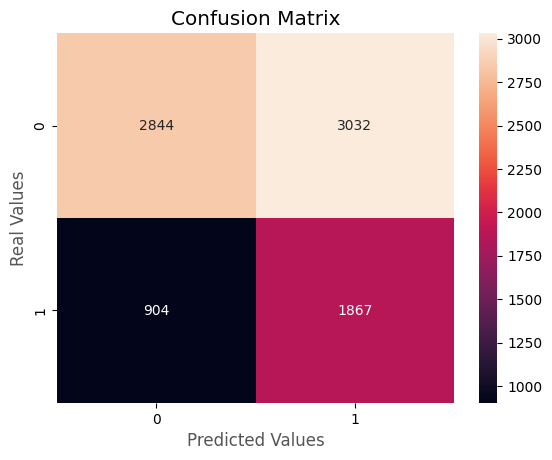

              precision    recall  f1-score   support

           0       0.76      0.48      0.59      5876
           1       0.38      0.67      0.49      2771

    accuracy                           0.54      8647
   macro avg       0.57      0.58      0.54      8647
weighted avg       0.64      0.54      0.56      8647

ROC-AUC = 0.6113340444489865.


In [23]:
# Make predictions on test set and evaluate it.
lgd_logistic_probas = lgd_logistic.predict(X_test_prepared)
threshold = 0.5
lgd_logistic_pred = np.where(lgd_logistic_probas >= threshold, 1, 0)

cm = confusion_matrix(y_test_lgd_logistic, lgd_logistic_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()
print(classification_report(y_test_lgd_logistic, lgd_logistic_pred))
print(f'ROC-AUC = {roc_auc_score(y_test_lgd_logistic, lgd_logistic_probas)}.')

- The model performance is not the best one. 
- Specifically, examining the confusion matrix reveals that the 1st stage LGD Model can correctly identify 2844 out of 5876 null recovery rates (48% recall for 0s) and 1867 out of 2771 recovery rates greater than zero (67% recall for 1s). This outcome was expected, given the limited charged-off loan data available.
- Despite its limitations, the model remains valuable for our purposes as the first stage. The emphasis here is on correctly classifying values greater than 0, because all instances predicted as greater than zero will still have their values predicted by the second stage LGD Linear Regression model. The recall for this case is 67%, and the AUC 61%. Thus, we can procceed to the second stage modeling with useful results. Moreover, it is also possible to find a better threshold value, enhancing this recall.
- I will balance the precision-recall trade-off below, trying to find the best threshold for enhancing the model's ability to correctly identify instances with recovery rate greater than zero.

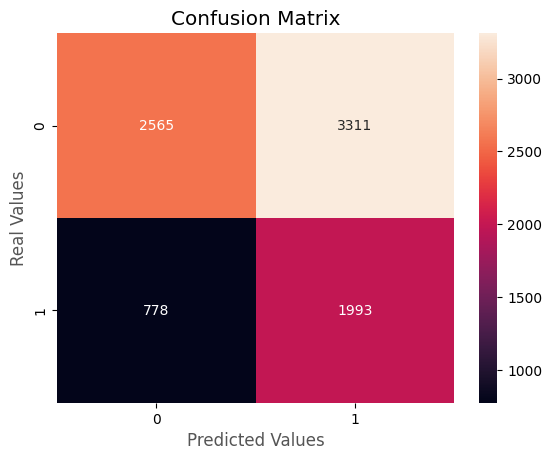

              precision    recall  f1-score   support

           0       0.77      0.44      0.56      5876
           1       0.38      0.72      0.49      2771

    accuracy                           0.53      8647
   macro avg       0.57      0.58      0.53      8647
weighted avg       0.64      0.53      0.54      8647



In [24]:
# Make predictions on test set and evaluate it.
threshold = 0.48
lgd_logistic_pred = np.where(lgd_logistic_probas >= threshold, 1, 0)

cm = confusion_matrix(y_test_lgd_logistic, lgd_logistic_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()
print(classification_report(y_test_lgd_logistic, lgd_logistic_pred))

- I will opt for a 0.48 threshold for classifying instances. This choice allows us to improve the recall for positive instances by 5%, reaching 72%, while sacrificing 4% of the negative instances recall, which now stands at 44%. Notably, precision remains consistent for both instances. Consequently, we can accurately identify 1993 out of 2771 recovery rates greater than zero (72%) and 2565 out of 5876 recovery rates equal to zero (44%).

#### 4.5.3 Estimate the 2nd Stage LGD Model (Linear Regression) on Default Data with Recovery Rates Greater than Zero

In [25]:
# Estimate the 2nd stage LGD Model (Linear Regression) on default data with recovery rates greater than zero.
X_train_lgd_linear_const = sm.add_constant(X_train_lgd_linear_prepared)
y_train_lgd_linear_reshaped = y_train_lgd_linear.values.reshape(-1, 1)
lgd_linear = sm.OLS(y_train_lgd_linear_reshaped, X_train_lgd_linear_const).fit()

In [26]:
# Coefficients.
lgd_linear.params.sort_values(ascending=False)

const                                  0.105788
int_rate                               0.026933
initial_list_status_w                  0.024497
purpose_vacation_moving_wedding        0.007524
home_ownership_OWN                     0.006665
total_acc                              0.005940
term_60                                0.005776
tot_cur_bal                            0.005337
annual_inc                             0.002856
dti                                    0.002487
mths_since_earliest_cr_line            0.002161
mths_since_last_delinq                 0.001381
verification_status_Verified           0.001096
emp_length                             0.000984
verification_status_Source Verified    0.000780
home_ownership_RENT_NONE_OTHER         0.000606
revol_bal                             -0.000520
inq_last_6mths                        -0.000770
purpose_other                         -0.001598
purpose_debt_consolidation            -0.001822
purpose_major_purchase                -0

- Some interpretation: The interest rate coefficient is 0.026933. This implies that for each one percentage point increase in the interest rate, there is approximately a 2.7 percentage point increase in the recovery rate.

#### 4.5.4 Make Predictions on Test Set and Evaluate it.

Mean Absolute Error (MAE): 0.0523
Mean Absolute Percentage Error (MAPE): 63.2022
Mean Squared Error (MSE): 0.0068
Root Mean Squared Error (RMSE): 0.0825


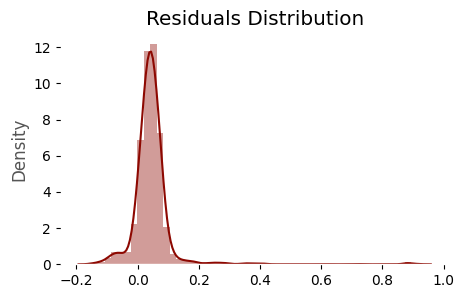

,Model,MAE,MAPE,RMSE
Results,LGD Linear Regression,0.0523,63.2022,0.0825


In [27]:
# Make predictions on test set and evaluate it.
X_test_lgd_linear_const = sm.add_constant(X_test_lgd_linear_prepared)
lgd_linear_pred = lgd_linear.predict(X_test_lgd_linear_const)
evaluate_regressor(y_test_lgd_linear.reset_index(drop=True), lgd_linear_pred, y_train_lgd_linear.reset_index(drop=True), 'LGD Linear Regression')

- The model demonstrates satisfactory performance, as indicated by a mean absolute error (MAE) of 0.0523. On average, the predicted recovery rates deviate by approximately 5.23 percentage points from the actual values. Furthermore, the residuals distribution is similar to a normal curve, with a mean very close to zero. The extended tail on the right suggests that the model tends to underestimate recovery rates for some higher values.
- The large MAPE is expected: The output can be arbitrarily high when y_true is small (which is specific to the metric).

In [28]:
# Take a look at actual vs predicted and residual values.
df = compare_actual_predicted_regression(y_test_lgd_linear.reset_index(drop=True), lgd_linear_pred)
df.sample(15, random_state=42)

,Actual,Predicted,Residual
1106,0.06,0.10,0.05
1321,0.15,0.10,0.05
2313,0.14,0.15,0.01
2274,0.16,0.12,0.05
1432,0.15,0.09,0.06
2240,0.17,0.12,0.05
965,0.16,0.09,0.07
2630,0.14,0.11,0.03
2134,0.16,0.09,0.07
2296,0.09,0.14,0.05


- By comparing actual versus predicted recovery rates, it appears that the model's predictions align reasonably well with the observed values.

##### 4.5.5 Obtain the Final LGD Model
- Now, I will **combine stage 1 and stage 2 LGD Models to obtain the final LGD = 1 - Recovery Rate model.** 
- Every observation classified as 0 by the stage 1 logistic regression model has estimated recovery rate of 0. Every observation classified as 1 by the stage 1 logistic regression model has estimated recovery rate as per the stage 2 linear regression model.
- I will simply **multiply predicted values from the two models**. Wherever there is a 0 predicted by the first model, all values predicted by the second model are multiplied by it will remain 0. Wherever there is a 1, all values predicted by the second model are multiplied by 1 so they will remain the same.

In [29]:
# Combine stage 1 and stage 2 LGD Models.

# Predict the recovery rate with stage 2 LGD Model in all data.
X_test_lgd_const = sm.add_constant(X_test_prepared)
lgd_linear_pred_all = lgd_linear.predict(X_test_lgd_const)

lgd_pred = lgd_logistic_pred * lgd_linear_pred_all

- Descriptive statistics.

In [30]:
lgd_pred.describe()

count    8647.000000
mean        0.065471
std         0.054651
min         0.000000
25%         0.000000
50%         0.086032
75%         0.110600
max         0.264260
dtype: float64

- There is no inconsistent predicted value. Everything seems ok.

#### 4.6 Estimate the EAD Model
- The EAD Model will be directly a linear regression to predict the credit conversion factor, once its distribution was reasonable and did not present a bias towards 0 like recovery rate.

In [31]:
# Estimate the EAD Model.
X_train_prepared_const = sm.add_constant(X_train_prepared)
y_train_ead_reshaped = y_train_ead.values.reshape(-1, 1)
ead_model = sm.OLS(y_train_ead_reshaped, X_train_prepared_const).fit()

In [32]:
# Coefficients.
ead_model.params.sort_values(ascending=False)

const                                  0.635260
term_60                                0.120057
int_rate                               0.060229
initial_list_status_w                  0.035587
purpose_small_business                 0.026856
verification_status_Source Verified    0.026192
purpose_other                          0.018258
purpose_vacation_moving_wedding        0.016629
purpose_major_purchase                 0.015705
purpose_home_improvement               0.012028
inq_last_6mths                         0.010386
tot_cur_bal                            0.009117
verification_status_Verified           0.009069
total_acc                              0.008883
home_ownership_OWN                     0.008693
home_ownership_RENT_NONE_OTHER         0.007283
purpose_debt_consolidation             0.007012
dti                                    0.004479
loan_amnt                              0.002763
region_West                            0.000719
purpose_house_car_medical              0

- Some interpretation: If the loan has a 60-month term, the credit conversion factor increases by 12 percentage points.

#### 4.6.1 Make predictions on test set and evaluate it

Mean Absolute Error (MAE): 0.1353
Mean Absolute Percentage Error (MAPE): 16.0853
Mean Squared Error (MSE): 0.0255
Root Mean Squared Error (RMSE): 0.1597


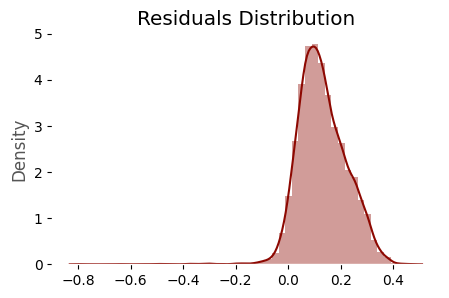

,Model,MAE,MAPE,RMSE
Results,EAD Linear Regression,0.1353,16.0853,0.1597


In [33]:
# Predict and evaluate.
X_test_ead_const = sm.add_constant(X_test_prepared)
ead_pred = ead_model.predict(X_test_ead_const)
evaluate_regressor(y_test_ead.reset_index(drop=True), ead_pred, y_train_ead.reset_index(drop=True), 'EAD Linear Regression')

- The model demonstrates useful performance, as indicated by a mean absolute error (MAE) of 0.1353. On average, the predicted credit conversion rates deviate by approximately 13.53 percentage points from the actual values. Furthermore, the residuals distribution is similar to a normal curve, with a mean very close to zero. The extended tail on the left suggests that the model tends to superestimate recovery rates for some lower values.
- The Mean Absolute Percentage Error (MAPE) of 16.0853 indicates that, on average, the model's predictions deviate by approximately 16.09% from the actual values (upside or downside). This is a good value for this metric.

In [34]:
# Take a look at actual vs predicted and residual values.
df = compare_actual_predicted_regression(y_test_ead.reset_index(drop=True), ead_pred)
df.sample(15, random_state=42)

,Actual,Predicted,Residual
5601,0.93,0.82,0.11
4103,0.90,0.84,0.06
222,0.73,0.64,0.09
7230,0.96,0.64,0.31
318,0.64,0.70,0.06
4668,0.78,0.65,0.13
736,0.91,0.78,0.13
5285,0.94,0.86,0.08
8335,0.91,0.65,0.26
5810,0.84,0.68,0.17


- We can see that it is not the best model. However, it is still useful, and as I will show further in this notebook, along with LGD and PD Model, will provide financial gains for Lending Club.

#### 4.6.2 EAD and LGD Models Artifacts
- Below, I will save the EAD and LGD Models' artifacts for reproducibility purposes. Once their memory size is lower than that of the PD Model, it will be possible to save them. However, still due to github large files issues, I will only save the models, not saving the raw and prepared train and test files and the predictions.

In [35]:
# Save LGD and EAD Models.
lgd_logistic_path = 'E:/lending_club_rep/Lending-Club-Credit-Scoring/artifacts/ead_lgd_models/lgd_logistic.pkl'
lgd_linear_path = 'E:/lending_club_rep/Lending-Club-Credit-Scoring/artifacts/ead_lgd_models/lgd_linear.pkl'
ead_model_path = 'E:/lending_club_rep/Lending-Club-Credit-Scoring/artifacts/ead_lgd_models/ead_model.pkl'
save_object(lgd_logistic_path, lgd_logistic)
save_object(lgd_linear_path, lgd_linear)
save_object(ead_model_path, ead_model)



In [48]:

# Save the preprocessor that was fitted on X_train
preprocessor_path = 'E:/lending_club_rep/Lending-Club-Credit-Scoring/artifacts/ead_lgd_models/ead_lgd_preprocessor.pkl'
save_object(preprocessor_path, preprocessor)
print("Preprocessor saved successfully!")

Preprocessor saved successfully!


#### 4.7 Compute the Expected Loss and Stablish a Credit Policy
- To compute **Expected Loss (EL)**, which is the product of Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD), I will leverage the results of the **three models (PD, EAD, and LGD Models) on the test data used for testing the PD Model**, encompassing **both default and non-default loans**. Although EAD and LGD models were trained on bad loan data, this approach simulates a realistic scenario for Expected Loss forecasting and credit policy development, considering that we don't have prior knowledge of whether applicants will become good or bad loans.
- Subsequently, I will utilize the computed Expected Loss (EL) for the establishment of a **credit policy**, which is a set of guidelines and criteria established by a financial institution or organization to govern the assessment, approval, and management of credit risk associated with lending activities. 
- I will create **risk classes** based on the **probability of default** because this way we can better leverage the results of the credit scoring model, and it is possible to establish **different policies** for individuals in different risk classes. Thus, I will create ten risk classes **(AA, A, AB, BB, B, BC, C, CD, DD, F)** based on probability of default deciles, allowing Lending Club to adopt distinct approaches for riskier and less risky individuals.
- In this context, **Lending Club** is adopting a **more conservative profile** with a **focus** on the **profitability** of its assets. The goal is to mitigate risks associated with higher-risk and potential default loans while maximizing profitability. 
- To achieve this, the **CEO** has outlined a **conservative credit policy:** We will **automatically approve** loans for applicants who fall into **AA and A risk classes** (indicating the lowest credit risk and highest credit scores) and automatically **deny** those who fall into the **F class** (indicating the highest credit risk and lowest credit scores). For the **other classes**, the loan must provide an annualized Return on Investment **(ROI) greater than the basic United States interest rate.** This criterion aligns with the rationale that if a loan's expected ROI doesn't surpass this interest rate, it may be more prudent to invest in less risky options, such as fixed-income investments.
- The Expected ROI is calculated by considering the net gain from the loan, which is the interest earned minus the expected loss, and expressing it as a percentage of the loan amount over its term:
    - **E(ROI) = (Gains - E(Loss) - Costs) / Investment >= 2.15%**
- Considering the data goes up until 2015, let's assume that the United States has a basic interest rate of 2.15%.

#### 4.7.1 Obtain the PD Model Outcomes
- It was not possible to save the PD Model due to github large files issues. However, it was possible to save its outcomes, the train and test borrowers calculated credit scores, actual outcomes and probabilities of default for each 20% most recent test data records. I will use this to combine the PD, EAD and LGD Models to estimate the EL and design the credit policy.

In [36]:
# Obtain the PD Model outcomes.
train_scores_path = 'E:/lending_club_rep/Lending-Club-Credit-Scoring/artifacts/pd_model/train_scores.parquet'
test_scores_path = 'E:/lending_club_rep/Lending-Club-Credit-Scoring/artifacts/pd_model/test_scores.parquet'
train_scores = pd.read_parquet(train_scores_path)
test_scores = pd.read_parquet(test_scores_path)

In [37]:
test_scores.head()

,Actual,Probability of Default (PD),Score
0,1,0.338131,466.0
1,0,0.133427,564.0
2,1,0.191392,530.0
3,1,0.067180,626.0
4,0,0.282578,488.0


#### 4.7.2 Calculate EAD and LGD on the Same Test Data
- As a good practice, I trained the LGD and EAD models using only data containing charged-off loans — those that defaulted and with sufficient time passed for recoveries to be made.
- Next, I will utilize these trained models to **predict EAD and LGD on the entire test dataset** (the same one used for the PD model, comprising the **20% most recent loans**), for **both default and non-default loans.**
- Finally, I will **merge the predictions from the PD, EAD, and LGD** models on the test data to **calculate the Expected Loss (EL)** and formulate the **credit policy.**
- It will be necessary to apply the same preprocessing applied to EAD and LGD Models to the 20% most recent loans data, an then predict.

In [38]:
# Obtain the raw data.
df_ead_lgd = pd.read_parquet(parquet_file_path)

# Out-of-time train-test-split. Get the 20% most recent loan data for the credit policy.
_, test_ead_lgd = np.split(df_ead_lgd, [int(.80 * len(df_ead_lgd))])
test_ead_lgd.shape

(93252, 42)

In [39]:
# Predict recovery rate, credit conversion factor, lgd and ead.
_, _, ead_final_pred, lgd_final_pred = predict_ead_lgd(test_ead_lgd, preprocessor, ead_model,
                                                       lgd_logistic, lgd_linear)

In [40]:
# Descriptive statistics.
ead_final_pred.describe()

count    93252.000000
mean     10465.519869
std       6654.934660
min        490.689472
25%       5197.384155
50%       9094.638970
75%      14490.378365
max      34104.567711
dtype: float64

In [41]:
# Descriptive statistics.
lgd_final_pred.describe()

count    93252.000000
mean         0.946107
std          0.013902
min          0.399657
25%          0.938926
50%          0.947820
75%          0.955546
max          0.984390
dtype: float64

#### 4.7.3 Expected Losses and Credit Policy
- As mentioned above, the **credit policy** is **conservative** and establishes that we will **automatically approve** loans for applicants who fall into **AA and A risk classes** and automatically **deny** those who fall into the **F class**. For the **other classes**, **loans with an annualized ROI higher than the basic US interest rate will be approved.** **Lending Club** intends to **focus on profit** while minimizing risk. This strategy is based on the rationale that if the expected ROI of the loan is lower than the US interest rate, it is better to invest the money in a less risky option, such as fixed income.
- Below is the computed **credit policy**, with loan characteristics such as term, interest rate, and loan amount, and risk characteristics like credit score, risk class, PD, EAD, LGD, EL, and expected returns (ROI and annualized ROI). We have the **status approved or not for the loans based on the aforementioned criteria.**
-  The computed **credit scores** can be used by the analysts, along with the credit policy, to decide whether to approve a loan that was automatically denied by the policy. We refer to this as an **override.** 
- Moreover, **other configurations of policy** can also be done. This is a specific design.

In [42]:
credit_policy_df = compute_credit_policy(test_ead_lgd, 
                                         test_scores[['Actual', 'Score', 'Probability of Default (PD)']], 
                                         ead_final_pred, 
                                         lgd_final_pred, 
                                         0.01, ['AA', 'A'],
                                         ['F'], 2.15)
credit_policy_df.sample(10, random_state=20)

,Term,Interest Rate,Loan Amount,Actual,Credit Score,Risk Class,Score Range,Probability of Default (PD),Exposure at Default (EAD),Loss Given Default (LGD),Expected Loss (EL),ROI (%),Annualized ROI (%),Approved
59802,60,20.99,26000,1,593.0,BC,588.0-602.0,0.097845,21767.757607,0.921880,1963.481735,20.904481,4.181,1
42604,36,6.03,10000,1,687.0,A,657.0-687.0,0.032051,5834.006248,0.970821,181.531864,6.001847,2.001,1
31794,60,20.99,25000,1,568.0,CD,555.0-572.0,0.127187,21935.159155,0.921770,2571.614265,20.877135,4.175,1
16781,36,7.12,15000,1,730.0,AA,688.0-820.0,0.019500,9134.256592,0.943215,168.004204,7.098800,2.366,1
56060,36,14.99,2000,1,587.0,C,573.0-587.0,0.104411,1382.756353,0.958047,138.317638,14.910841,4.970,1
68814,36,6.49,19200,1,784.0,AA,688.0-820.0,0.010004,11066.350740,0.959496,106.223058,6.474467,2.158,1
10849,36,11.67,6400,1,663.0,A,657.0-687.0,0.043683,4204.440862,0.938229,172.319037,11.633075,3.878,1
73429,36,12.99,10000,1,544.0,DD,531.0-554.0,0.166539,6625.360444,0.955672,1054.470693,12.874553,4.292,1
37965,60,23.43,10075,1,527.0,F,419.0-530.0,0.196476,8846.648767,0.917021,1593.923068,23.261795,4.652,0
36039,36,7.69,8000,1,664.0,A,657.0-687.0,0.043306,4903.885243,0.970569,206.119490,7.654235,2.551,1


In [43]:
credit_policy_df.Approved.value_counts(normalize=True)*100

Approved
1    88.656544
0    11.343456
Name: proportion, dtype: float64

In [44]:
credit_policy_df.Actual.value_counts(normalize=True) * 100

Actual
1    93.285935
0     6.714065
Name: proportion, dtype: float64

In [45]:
credit_policy_df.loc[credit_policy_df['Approved'] == 1, 'Actual'].value_counts(normalize=True) * 100

Actual
1    94.356146
0     5.643854
Name: proportion, dtype: float64

In [60]:
credit_policy_df.loc[credit_policy_df['Approved'] == 1, 'Actual'].value_counts(normalize=True) * 100


Actual
1    94.356146
0     5.643854
Name: proportion, dtype: float64

- With this criteria, we reject about 11% of the loans. Moreover, the default rate decreases from 6.7% to 5.65%.

In [46]:
total_EL = round(credit_policy_df['Expected Loss (EL)'].sum() / credit_policy_df['Loan Amount'].sum() * 100, 2)
amnt_EL = round(credit_policy_df['Expected Loss (EL)'].sum(), 2)
print(f"Overall Lending Club's Expected Loss (EL) = {total_EL}%.")
print(f"This represents an amount of = ${amnt_EL}.")

Overall Lending Club's Expected Loss (EL) = 6.91%.
This represents an amount of = $95577891.09.


- The overall Expected Loss (EL) of Lending Club's investment portfolio is 6.91%, representing an amount of 95,584,225 dollars. Let's calculate the same metrics for the loans approved in our credit policy and see whether the amount Lending Club will possibly loss has reduced.

In [47]:
# Calculate the Expected Loss for the approved loans with respect.
approved = credit_policy_df.loc[credit_policy_df['Approved'] == 1]
approved_EL = round(approved['Expected Loss (EL)'].sum() / approved['Loan Amount'].sum() * 100, 2)
approved_amnt_EL = round(approved['Expected Loss (EL)'].sum(), 2)
print(f"Overall Lending Club's Expected Loss (EL) w/ Credit Policy = {approved_EL}%.")
print(f"This represents an amount of = ${approved_amnt_EL}.")

Overall Lending Club's Expected Loss (EL) w/ Credit Policy = 5.76%.
This represents an amount of = $70124166.56.



Analyzing different credit policy scenarios...

                                 Detailed Comparison of Credit Policy Scenarios                                
     Scenario     Approval Rate Default Rate Expected Loss % Expected Loss Amount Total Loan Amount Average ROI
        No Policy     94.14%       7.04%          7.22%         $93,155,462.69    $1,290,039,350.00    3.84%   
   Current Policy     88.66%       5.64%          5.76%         $70,124,166.56    $1,218,167,625.00    3.59%   
More Conservative     77.98%       4.94%          5.03%         $53,306,289.44    $1,060,317,475.00    3.50%   
Less Conservative     89.47%       5.61%          5.73%         $70,686,918.11    $1,233,141,950.00    3.58%   
Very Conservative     68.26%       4.32%          4.40%         $40,751,407.82      $926,134,750.00    3.38%   

Improvements over No Policy:

No Policy:
Default Rate Reduction: 0.00%
Expected Loss Reduction: $0.00
Loan Amount Reduction: $0.00
Average ROI: 3.84%

Current Policy:

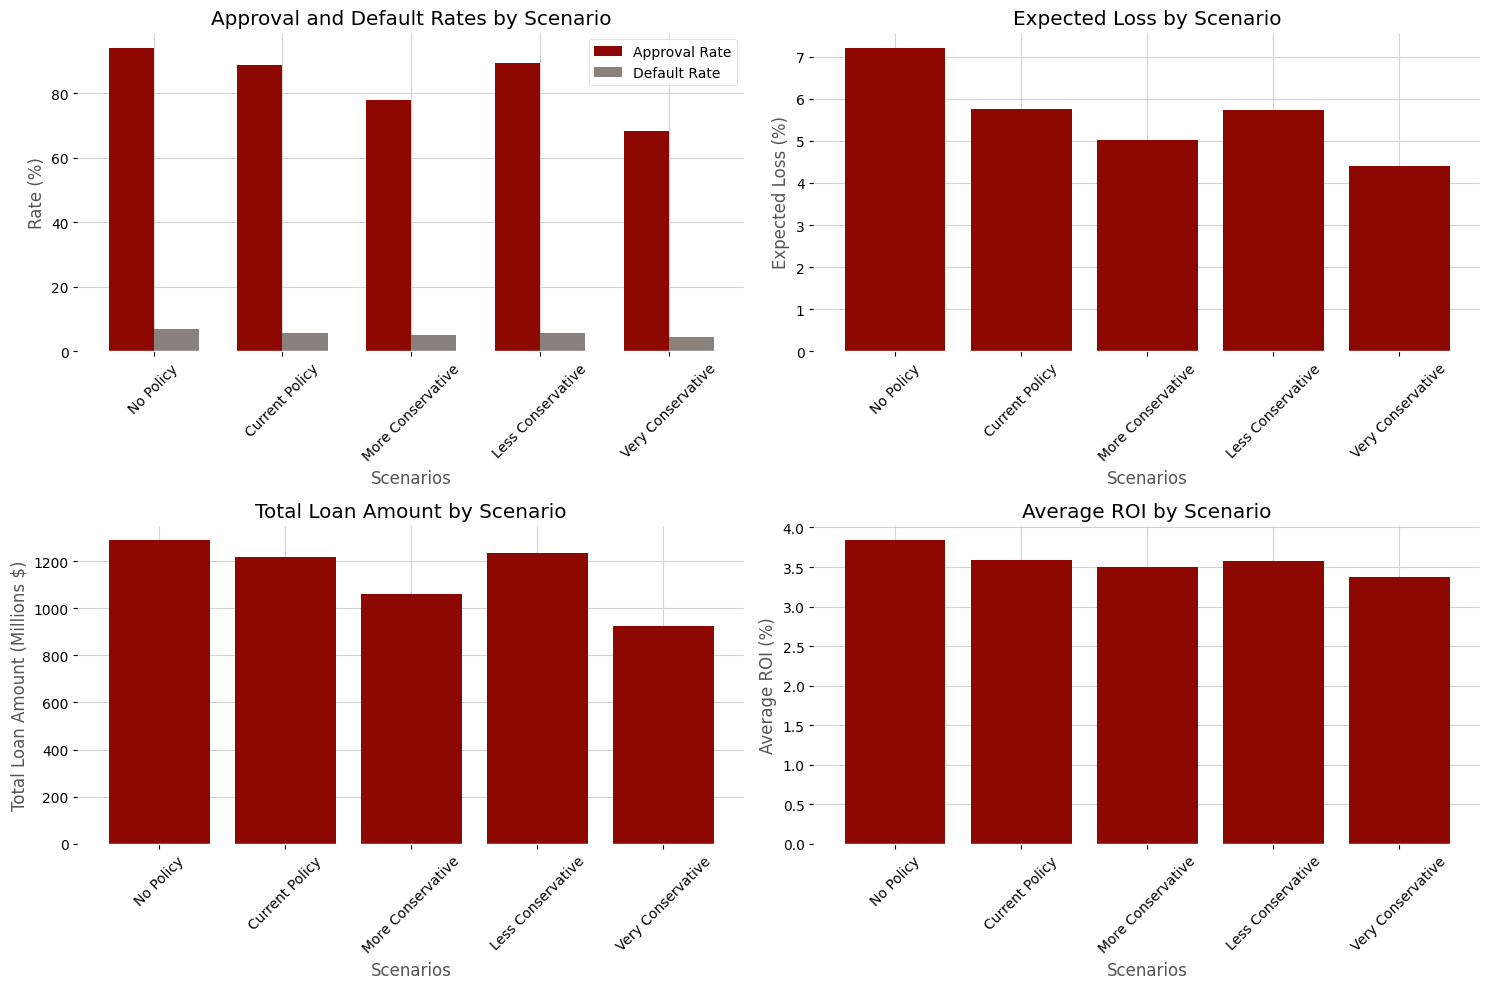

In [84]:
# Analyze different credit policy scenarios
print("\nAnalyzing different credit policy scenarios...")

# Define scenarios to analyze
scenarios = {
    'No Policy': {
        'auto_approve': [],
        'auto_deny': [],
        'basic_us_int_rate': 2.15
    },
    'Current Policy': {
        'auto_approve': ['AA', 'A'],
        'auto_deny': ['F'],
        'basic_us_int_rate': 2.15
    },
    'More Conservative': {
        'auto_approve': ['AA'],
        'auto_deny': ['F', 'DD'],
        'basic_us_int_rate': 2.15
    },
    'Less Conservative': {
        'auto_approve': ['AA', 'A', 'AB'],
        'auto_deny': ['F'],
        'basic_us_int_rate': 2.15
    },
    'Very Conservative': {
        'auto_approve': ['AA'],
        'auto_deny': ['F', 'DD', 'CD'],
        'basic_us_int_rate': 2.15
    }
}

# Store results
results = []

# Run each scenario
for name, params in scenarios.items():
    policy = compute_credit_policy(test_ead_lgd, 
                                 test_scores[['Actual', 'Score', 'Probability of Default (PD)']], 
                                 ead_final_pred, 
                                 lgd_final_pred, 
                                 0.01,  # loan_fee
                                 params['auto_approve'],
                                 params['auto_deny'],
                                 params['basic_us_int_rate'])
    
    approved = policy[policy['Approved'] == 1]
    
    results.append({
        'Scenario': name,
        'Approval Rate': len(approved) / len(policy) * 100,
        'Default Rate': (len(approved[approved['Actual'] == 0]) / len(approved) * 100) if len(approved) > 0 else 0,
        'Expected Loss %': (approved['Expected Loss (EL)'].sum() / approved['Loan Amount'].sum()) * 100,
        'Expected Loss Amount': approved['Expected Loss (EL)'].sum(),
        'Total Loan Amount': approved['Loan Amount'].sum(),
        'Average ROI': approved['Annualized ROI (%)'].mean()
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
#print("\nDetailed Comparison of Credit Policy Scenarios:")
#print("=" * 100)
#print(results_df.to_string(index=False))

# Format the DataFrame for display
pd.options.display.float_format = '{:,.2f}'.format  # Default format for float numbers

# Create formatted DataFrame for display
display_df = results_df.copy()

# Format percentage columns
percentage_columns = ['Approval Rate', 'Default Rate', 'Expected Loss %', 'Average ROI']
for col in percentage_columns:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.2f}%")

# Format amount columns with commas and no scientific notation
amount_columns = ['Expected Loss Amount', 'Total Loan Amount']
for col in amount_columns:
    display_df[col] = display_df[col].apply(lambda x: f"${x:,.2f}")

table_width = len(display_df.to_string(index=False).split('\n')[0])

# Print centered results
print("\n" + "Detailed Comparison of Credit Policy Scenarios".center(table_width))
print("=" * table_width)
print(display_df.to_string(index=False, justify='center'))

# Calculate improvements over no policy
print("\nImprovements over No Policy:")
print("=" * 100)
no_policy = compute_credit_policy(test_ead_lgd, 
                                test_scores[['Actual', 'Score', 'Probability of Default (PD)']], 
                                ead_final_pred, 
                                lgd_final_pred, 
                                0.01, [], [], 2.15)

#base_default_rate = no_policy['Actual'].mean() * 100
#base_expected_loss = no_policy['Expected Loss (EL)'].sum()
#base_loan_amount = no_policy['Loan Amount'].sum()

approved = no_policy[no_policy['Approved'] == 1]
base_default_rate = (len(approved[approved['Actual'] == 0]) / len(approved) * 100) if len(approved) > 0 else 0
base_expected_loss = approved['Expected Loss (EL)'].sum()
base_loan_amount = approved['Loan Amount'].sum()

for _, row in results_df.iterrows():
    print(f"\n{row['Scenario']}:")
    print(f"Default Rate Reduction: {base_default_rate - row['Default Rate']:.2f}%")
    print(f"Expected Loss Reduction: ${base_expected_loss - row['Expected Loss Amount']:,.2f}")
    print(f"Loan Amount Reduction: ${base_loan_amount - row['Total Loan Amount']:,.2f}")
    print(f"Average ROI: {row['Average ROI']:.2f}%")

# Visualize key metrics
plt.figure(figsize=(15, 10))

# Plot 1: Approval and Default Rates
plt.subplot(2, 2, 1)
x = range(len(results_df))
width = 0.35
plt.bar(x, results_df['Approval Rate'], width, label='Approval Rate')
plt.bar([i + width for i in x], results_df['Default Rate'], width, label='Default Rate')
plt.xlabel('Scenarios')
plt.ylabel('Rate (%)')
plt.title('Approval and Default Rates by Scenario')
plt.xticks([i + width/2 for i in x], results_df['Scenario'], rotation=45)
plt.legend()

# Plot 2: Expected Loss
plt.subplot(2, 2, 2)
plt.bar(x, results_df['Expected Loss %'])
plt.xlabel('Scenarios')
plt.ylabel('Expected Loss (%)')
plt.title('Expected Loss by Scenario')
plt.xticks(x, results_df['Scenario'], rotation=45)

# Plot 3: Total Loan Amount
plt.subplot(2, 2, 3)
plt.bar(x, results_df['Total Loan Amount'] / 1e6)  # Convert to millions
plt.xlabel('Scenarios')
plt.ylabel('Total Loan Amount (Millions $)')
plt.title('Total Loan Amount by Scenario')
plt.xticks(x, results_df['Scenario'], rotation=45)

# Plot 4: Average ROI
plt.subplot(2, 2, 4)
plt.bar(x, results_df['Average ROI'])
plt.xlabel('Scenarios')
plt.ylabel('Average ROI (%)')
plt.title('Average ROI by Scenario')
plt.xticks(x, results_df['Scenario'], rotation=45)

plt.tight_layout()
plt.show()

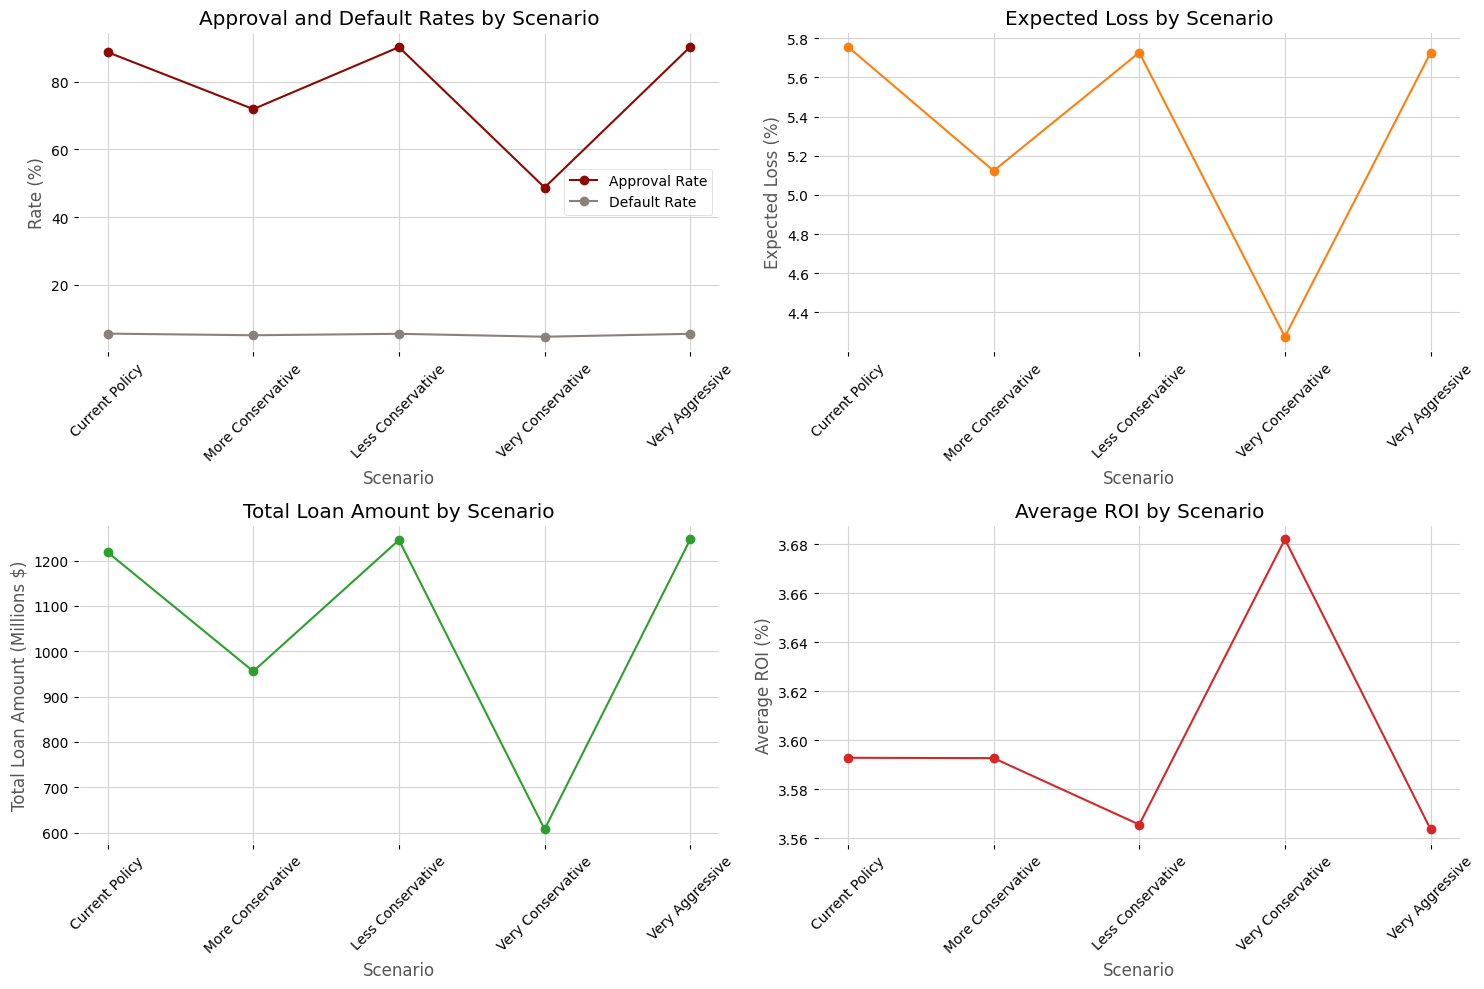

In [73]:


# If you haven't already, create results_df as in your previous code
# results_df = pd.DataFrame(results)

# Optionally, convert amounts to millions for readability
results_df['Expected Loss Amount (M)'] = results_df['Expected Loss Amount'] / 1e6
results_df['Total Loan Amount (M)'] = results_df['Total Loan Amount'] / 1e6

plt.figure(figsize=(15, 10))
scenarios = results_df['Scenario']

# Plot 1: Approval and Default Rates (Line Chart)
plt.subplot(2, 2, 1)
plt.plot(scenarios, results_df['Approval Rate'], marker='o', label='Approval Rate')
plt.plot(scenarios, results_df['Default Rate'], marker='o', label='Default Rate')
plt.xlabel('Scenario')
plt.ylabel('Rate (%)')
plt.title('Approval and Default Rates by Scenario')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plot 2: Expected Loss % (Line Chart)
plt.subplot(2, 2, 2)
plt.plot(scenarios, results_df['Expected Loss %'], marker='o', color='tab:orange')
plt.xlabel('Scenario')
plt.ylabel('Expected Loss (%)')
plt.title('Expected Loss by Scenario')
plt.xticks(rotation=45)
plt.grid(True)

# Plot 3: Total Loan Amount (Line Chart)
plt.subplot(2, 2, 3)
plt.plot(scenarios, results_df['Total Loan Amount (M)'], marker='o', color='tab:green')
plt.xlabel('Scenario')
plt.ylabel('Total Loan Amount (Millions $)')
plt.title('Total Loan Amount by Scenario')
plt.xticks(rotation=45)
plt.grid(True)

# Plot 4: Average ROI (Line Chart)
plt.subplot(2, 2, 4)
plt.plot(scenarios, results_df['Average ROI'], marker='o', color='tab:red')
plt.xlabel('Scenario')
plt.ylabel('Average ROI (%)')
plt.title('Average ROI by Scenario')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

- It is possible to see that the amount Lending Club expects to lose in its assets has reduced from 6.91% to 5.77%. 

- This is a very nice financial result. With our simple credit policy rules, by rejecting just 11% of the loans (including those belonging to the worst risk class, F, and those with an annualized ROI lower than 2.15, the basic US interest rate), both the amount Lending Club expects to lose in its assets and the default rate decreased. Specifically, the default rate decreased from 6.71% to 5.65% and the Expected Loss decreased from 6.91% to 5.77%. Although these represent little percentage points decreasement, when dealing with thousands of loans and funded amounts, it represents a substantial financial gain to Lending Club.
- Furthermore, other policies can also be designed, in a more restrictive or free way. This is just a draw to show that our project is worthwile.
- Finally, the business problem is solved.

#### 4.8 Conclusion
- In this notebook, we conducted **EAD and LGD modeling** on data containing only **charged-off defaulted loans** – that is, loans for which sufficient time has passed, allowing for recoveries. For EAD, we estimated the credit conversion factor through linear regression. It was then calculated as EAD = Funded Amount * Credit Conversion Factor. Regarding LGD, we estimated the recovery rate in two stages. First, we built a logistic regression model to predict whether the recovery rate was greater than zero (1) or zero (0). Those predicted as zero are maintained as such, while those predicted as greater than zero pass through a second stage linear regression that estimates the corresponding value.
- After estimating these models, it was possible to combine their outcomes with the PD model outcome and calculate the **expected losses (EL)** by obtaining the product of **PD * EAD * LGD**. With the expected losses, a **credit policy** was designed. Considering that **Lending Club** aims to focus on **profitability**, a more **conservative** policy is established: We will **automatically approve** loans for applicants who fall into **AA and A risk classes** and automatically **deny** those who fall into the **F class**. For the other classes, loans with an **annualized ROI higher than the basic US interest rate** will be **approved**; otherwise, they will be denied. This makes total sense since, if the loan's annualized ROI does not exceed the basic US interest rate, it is better to allocate the money to a less risky investment, such as fixed income.
- As a **financial result**, with our simple credit policy rules, by rejecting just 11% of the loans (including those belonging to the worst risk class, F, and those with an annualized ROI lower than 2.15, the basic US interest rate), both the amount Lending Club expects to lose in its assets and the default rate decreased. Specifically, the default rate decreased from 6.71% to 5.65% and the Expected Loss decreased from 6.91% to 5.77%. Although these represent little percentage points decreasement, when dealing with thousands of loans and funded amounts, it represents a substantial financial gain to Lending Club.
- Furthermore, other policies can also be designed, in a more restrictive or free way. This is just a draw to show that our project is worthwile.
- The next steps involve monitoring the PD Model in more recent data, which is made in the model monitoring notebook.